#### **2nd technique Random Sample Imputation**
Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

Importing the necessary libraries and the data set which is required

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv"
df = pd.read_csv(url, usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


Chgecking the null values into the dataset

In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

Checking the avg value for the missing values into the dataset

In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

Checking missing values for Particular column

In [5]:
df['Age'].isnull().sum()

177

Now in the below code we are replacing all the nan or null values with Some random values which is generating here.  
For E.g :  
423rd indexed is replaced by 28 value  
177th indexed is replaced by 50 vlaue and so on..  
#### **Why we have used Dropna ?**  
dropna is for like from all the records we have to pickup that only records which are null thats why we have used **dropna** for picking up the real values into it. 

One More thing if we have used `df['Age'].dropna().sample()` only this much then it'll only replace one record but we have to replace all the 177 missingt records, So for that we have used `df['Age'].isnull().sum(),random_state=0`

In [6]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0) # random state is nothing but any value that we can take any value

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

Checking the indexes of null values

In [7]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [8]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median) ## replacing the values with median
    df[variable+"_random"]=df[variable] ## creating a new column as '_random' which will have all the missing values replaced by random values

    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)

    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample ## loc the null values which will get replaced with random values

Lets see for median, check the median for age

In [9]:
median=df.Age.median()

In [10]:
median

28.0

Replacing the missing values with median and copying them to new column created as `Age_median`

In [11]:
impute_nan(df,"Age",median)

`Age_random` replaces the missing values with random values and `Age_median` replaces the missingt values with median values

In [13]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


Importing the visualization library

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

Checking the distribution of Age and Age_random in a graphical manner, or you can say that checking the difference through a graph  
**here distortion is not happening, as befor because of median distortion were happening**

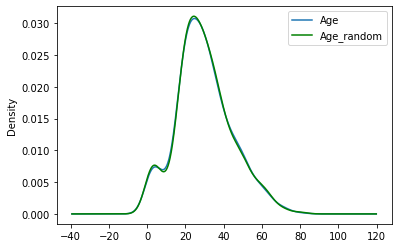

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax) # kde = Kernel Density estimators
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

**Here we can see distortion is happening with median**

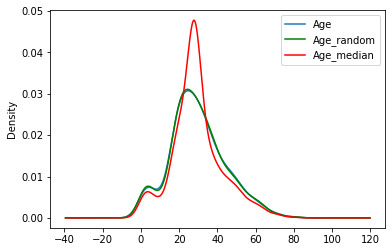

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax) # kde = Kernel Density estimators
df.Age_random.plot(kind='kde', ax=ax, color='green')
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

**Advantages**  
1. Easy To implement
2. There is less distortion in variance

**Disadvantage**
1. Every situation randomness wont work
2. Capturing NAN values with a new feature
3. It works well if the data are not missing completely at random

#### **3rd technique Capturing NAN values with a new feature**  
It works well if the data are not missing completely at random

In [22]:
df=pd.read_csv(url, usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


So in this we are going to find out the percentages of null values which are present in the Age column. we are using `numpy` for it and `isnull(),1,0` is like wherever there is null value if it is true then it will be replaced by **1** otherwise it will be replaced with **0** 

In [23]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [24]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


**Bottom 5 rows**

In [25]:
df.tail()

,Survived,Age,Fare,Age_NAN
886,0,27.0,13.00,0
887,1,19.0,30.00,0
888,0,NaN,23.45,1
889,1,26.0,30.00,0
890,0,32.0,7.75,0


In [26]:
df.Age.median()

28.0

In [27]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [28]:
df.head(20)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


**Advantages**  
1. Easy to implement
2. Captures the importance of missing values  

**Disadvantages**
1. Creating Additional Features(Curse of Dimensionality)

### **End of Distribution imputation**
used for missing completely at random

In [29]:
df=pd.read_csv(url, usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


**Histogram** to check the far end of the data, as we are going to take the end of the distribution

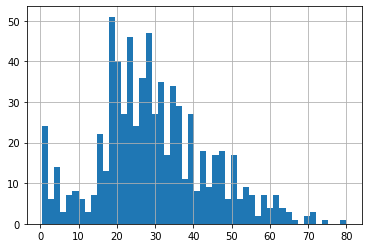

In [30]:
df.Age.hist(bins=50)

**Taking the data which is after the 3rd Std, for end distribution**

In [34]:
extreme = df.Age.mean()+3*df.Age.std()

In [35]:
extreme

73.27860964406095

**Checking the outliers with the help of** `boxplot`

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


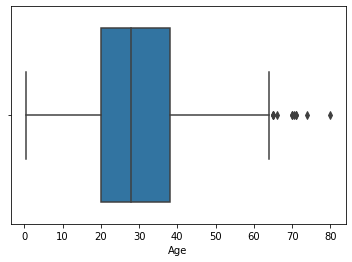

In [33]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [37]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme) ## creating new variable and filling nan values with extreme values
    df[variable].fillna(median,inplace=True) ## filling na with median

In [38]:
impute_nan(df,'Age',df.Age.median(),extreme)

For comparing we have replaced `median` values with the missing values present into the `Age` column and replaced there itself.
And we have made another feature `Age_end_distribution` which is replica of `Age` in that we have replaced `extreme` values with the missing values, and will then we'll compare it with original column.
So, for e.g 5th indexed Age - 28 (median value) and Age_end_distribution - 73.27 (extreme value)

In [40]:
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


**Replaced with median (distortion in middle)**

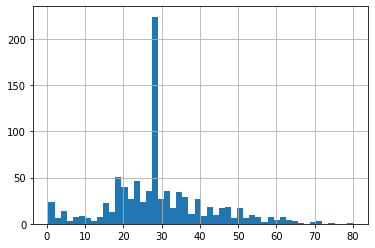

In [41]:
df['Age'].hist(bins=50)

**Replaced with Extreme value (distortion at the end)**

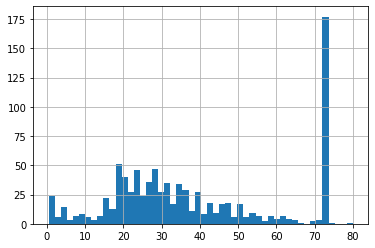

In [42]:
df['Age_end_distribution'].hist(bins=50)

No outliers due to change of this which is Replacing with Extreme values

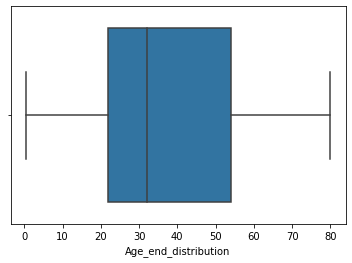

In [43]:
sns.boxplot('Age_end_distribution',data=df)